<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [47]:
# This will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from keras.src.callbacks import EarlyStopping

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn import metrics

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")


## Loading the dataset

In [207]:
df = pd.read_csv('Churn.csv')

## Data Overview

In [208]:
df.shape

(10000, 14)

In [209]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2      0.000              1          1               1   
1       1  83807.860              1          0               1   
2       8 159660.800              3          1               0   
3       1      0.000              2          0               0   
4       2 125510.820              1          1               1   

   EstimatedSalary  Exited  
0       101348.880       1  
1       112542.580       0  
2       113931.570       1  
3        93826.630       0  
4        79084.100       0

### Checking the data types of the columns for the dataset

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Checking for duplicate values

In [211]:
# let's check for duplicate values in the data
df.duplicated().sum()

0

### Checking for missing values

In [212]:
# let's check for missing values in the data
round(df.isnull().sum() / df.isnull().count() * 100, 2)

RowNumber         0.000
CustomerId        0.000
Surname           0.000
CreditScore       0.000
Geography         0.000
Gender            0.000
Age               0.000
Tenure            0.000
Balance           0.000
NumOfProducts     0.000
HasCrCard         0.000
IsActiveMember    0.000
EstimatedSalary   0.000
Exited            0.000
dtype: float64

In [213]:
# let's view the statistical summary of the numerical columns in the data
df.describe().T

count         mean       std          min          25%  \
RowNumber       10000.000     5000.500  2886.896        1.000     2500.750   
CustomerId      10000.000 15690940.569 71936.186 15565701.000 15628528.250   
CreditScore     10000.000      650.529    96.653      350.000      584.000   
Age             10000.000       38.922    10.488       18.000       32.000   
Tenure          10000.000        5.013     2.892        0.000        3.000   
Balance         10000.000    76485.889 62397.405        0.000        0.000   
NumOfProducts   10000.000        1.530     0.582        1.000        1.000   
HasCrCard       10000.000        0.706     0.456        0.000        0.000   
IsActiveMember  10000.000        0.515     0.500        0.000        0.000   
EstimatedSalary 10000.000   100090.240 57510.493       11.580    51002.110   
Exited          10000.000        0.204     0.403        0.000        0.000   

                         50%          75%          max  
RowNumber           5000.500     7500.250    10000.000  
CustomerId      15690738.000 15753233.750 15815690.000  
CreditScore          652.000      718.000      850.000  
Age                   37.000       44.000       92.000  
Tenure                 5.000        7.000       10.000  
Balance            97198.540   127644.240   250898.090  
NumOfProducts          1.000        2.000        4.000  
HasCrCard              1.000        1.000        1.000  
IsActiveMember         1.000        1.000        1.000  
EstimatedSalary   100193.915   149388.247   199992.480  
Exited                 0.000        0.000        1.000

In [214]:
# list of all variables
cat_col = df.columns

# printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(df[column].value_counts(normalize=True))
    print("-" * 50)

1       0.000
6671    0.000
6664    0.000
6665    0.000
6666    0.000
         ... 
3334    0.000
3335    0.000
3336    0.000
3337    0.000
10000   0.000
Name: RowNumber, Length: 10000, dtype: float64
--------------------------------------------------
15634602   0.000
15667932   0.000
15766185   0.000
15667632   0.000
15599024   0.000
            ... 
15599078   0.000
15702300   0.000
15660735   0.000
15671390   0.000
15628319   0.000
Name: CustomerId, Length: 10000, dtype: float64
--------------------------------------------------
Smith      0.003
Scott      0.003
Martin     0.003
Walker     0.003
Brown      0.003
            ... 
Izmailov   0.000
Bold       0.000
Bonham     0.000
Poninski   0.000
Burbidge   0.000
Name: Surname, Length: 2932, dtype: float64
--------------------------------------------------
850   0.023
678   0.006
655   0.005
705   0.005
667   0.005
       ... 
404   0.000
351   0.000
365   0.000
417   0.000
419   0.000
Name: CreditScore, Length: 460, dtype: float64
-

### Observation
* no missing value
* no duplucated value
* ***RowNumber*** doen't bring any value
* ***CustomerId*** is just an identifier and doen't bring value
* ***Balance*** the account balance shows an awkward data it seems 36.2% of the account balance show a balance of 0 
* ***RowNumber*** and ***CustomerId*** are data for Customer mamangement, they are not data produce by the bank's customer we can use as part or our model
* ***Surname*** will not bring value to our model

## Exploratory Data Analysis

### Univariate Analysis

In [215]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  
    # Adding a tile
    f2.suptitle(feature)
    
    # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [216]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [217]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [218]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [219]:
num_columns = df.select_dtypes(exclude="object").columns

In [220]:
num_columns = num_columns.drop(['RowNumber','CustomerId'])

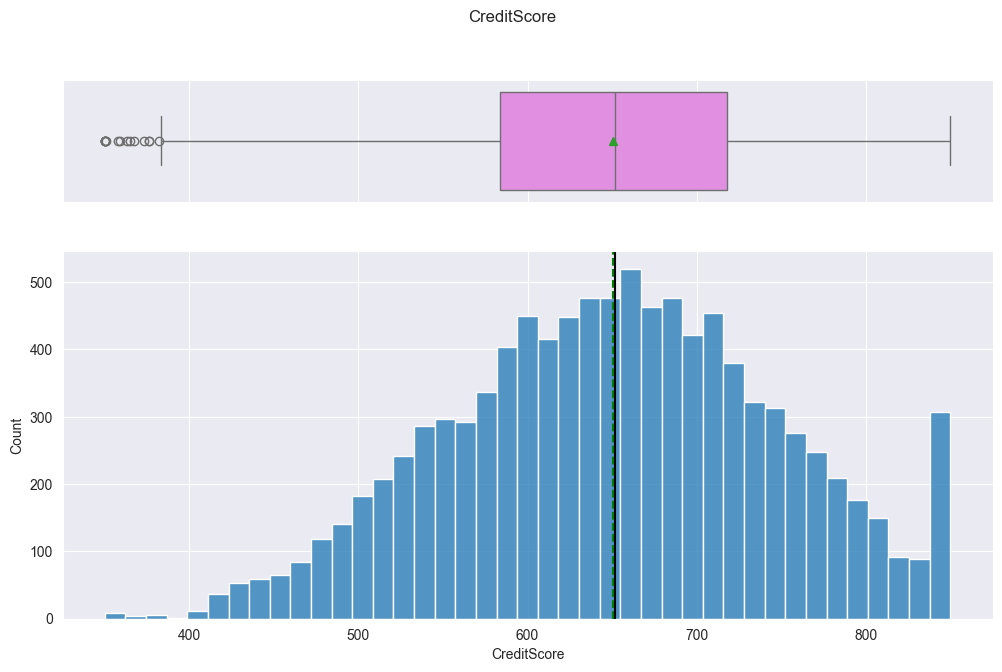

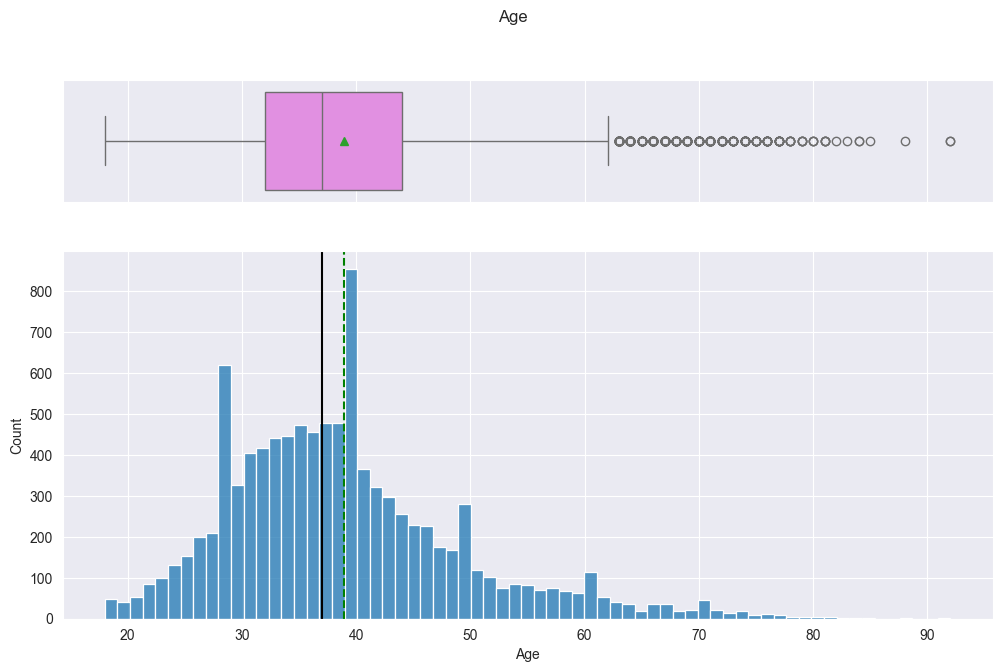

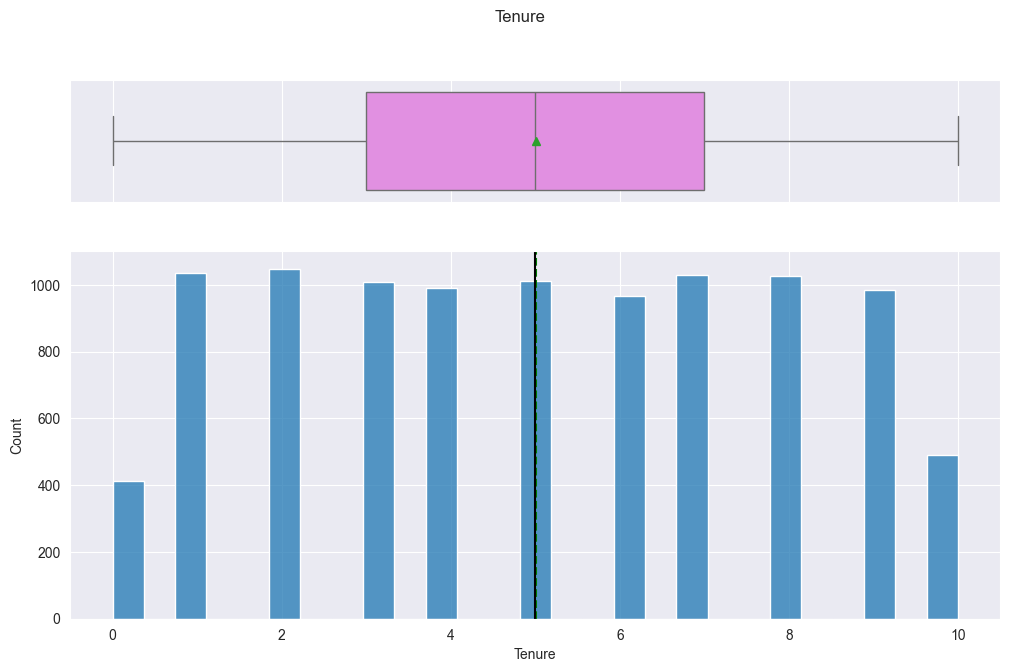

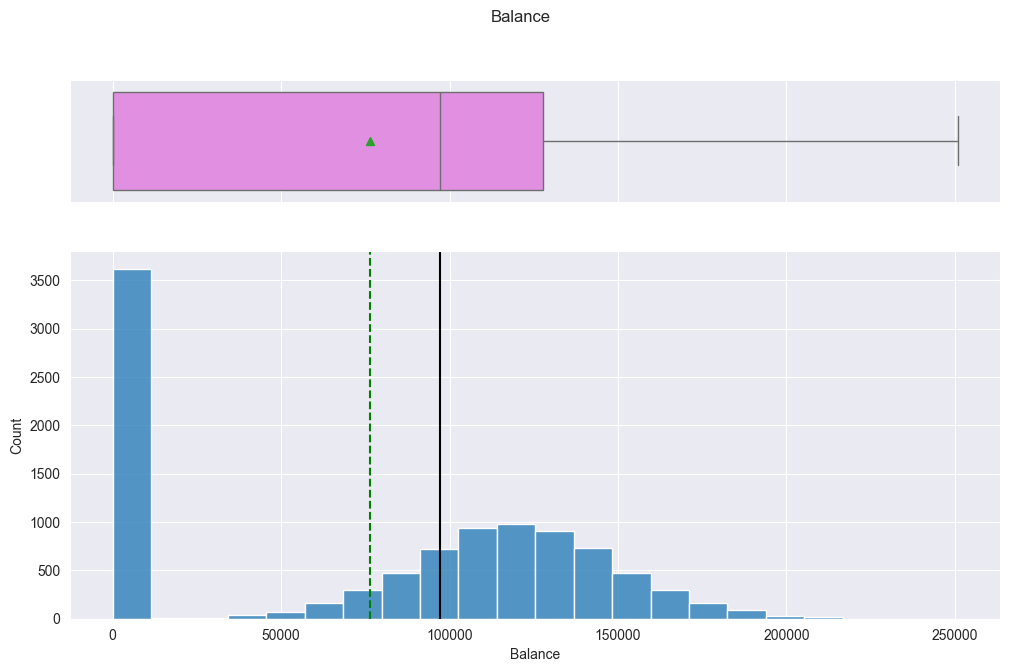

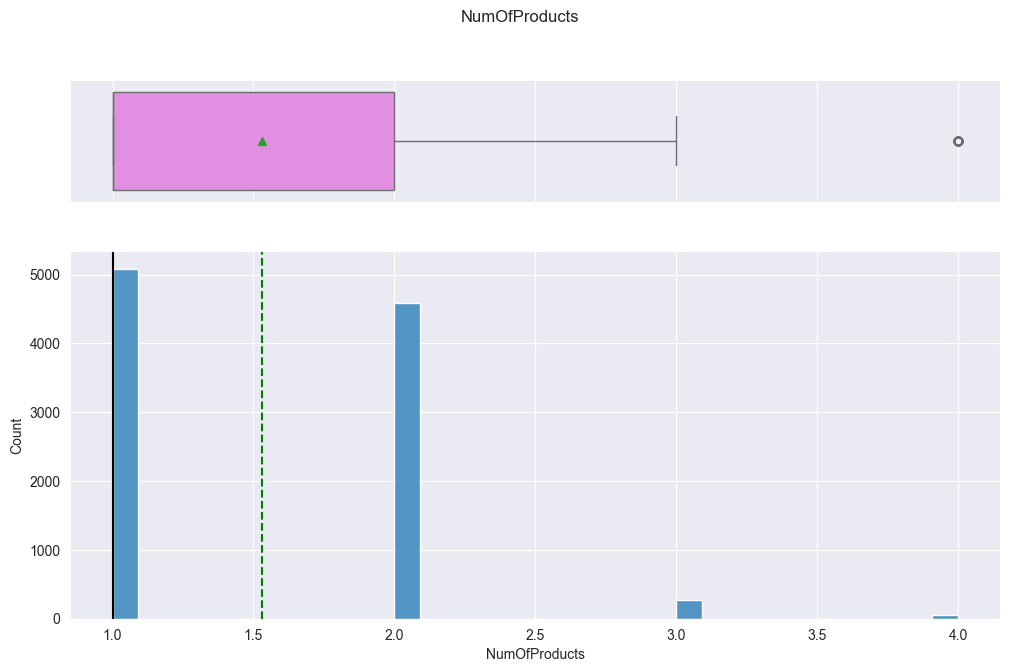

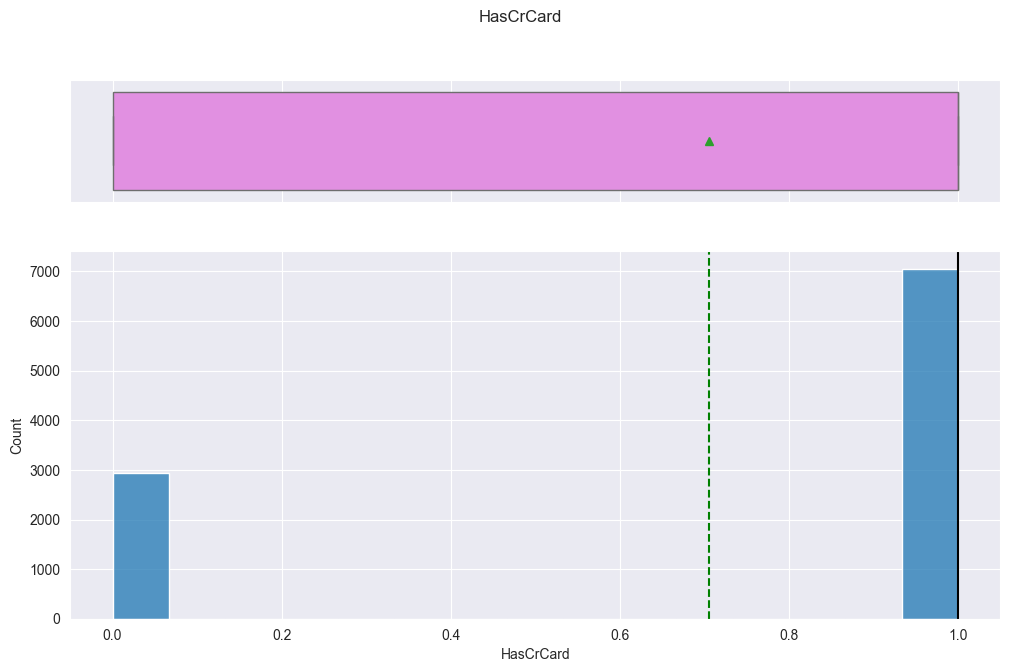

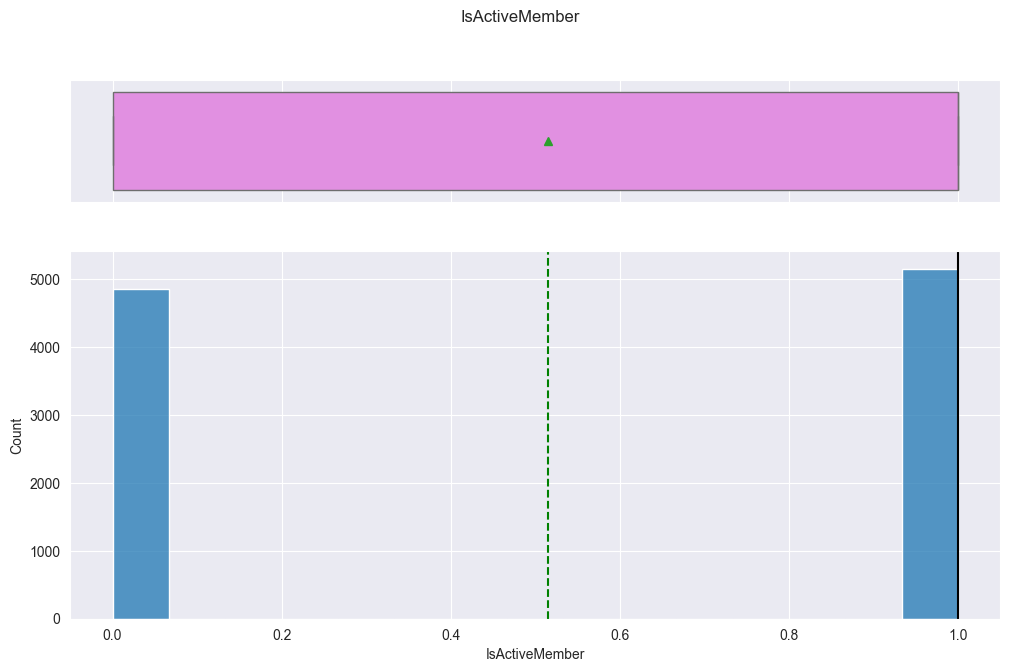

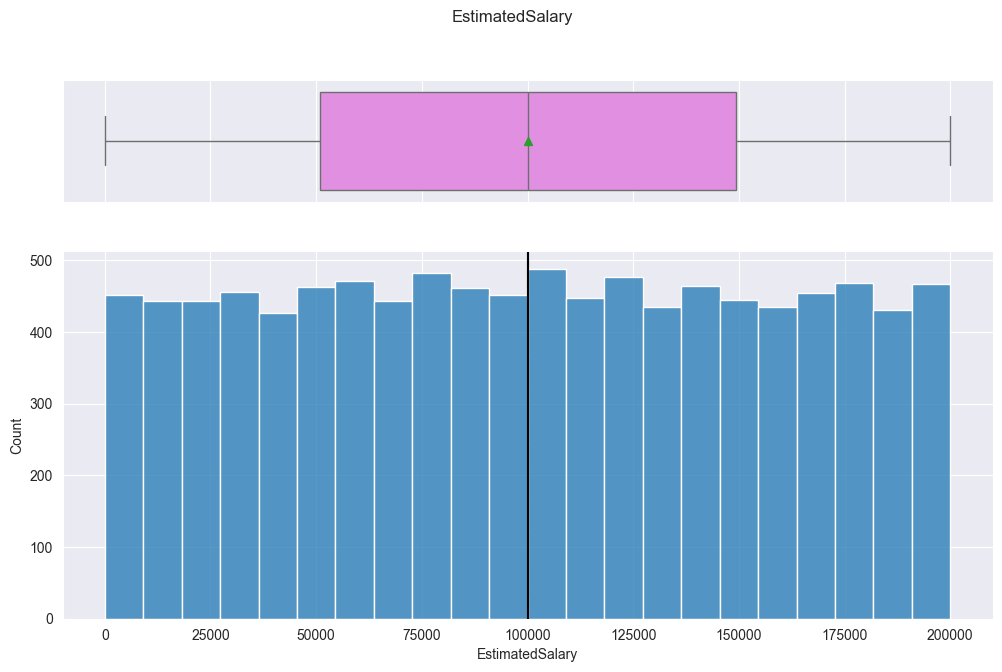

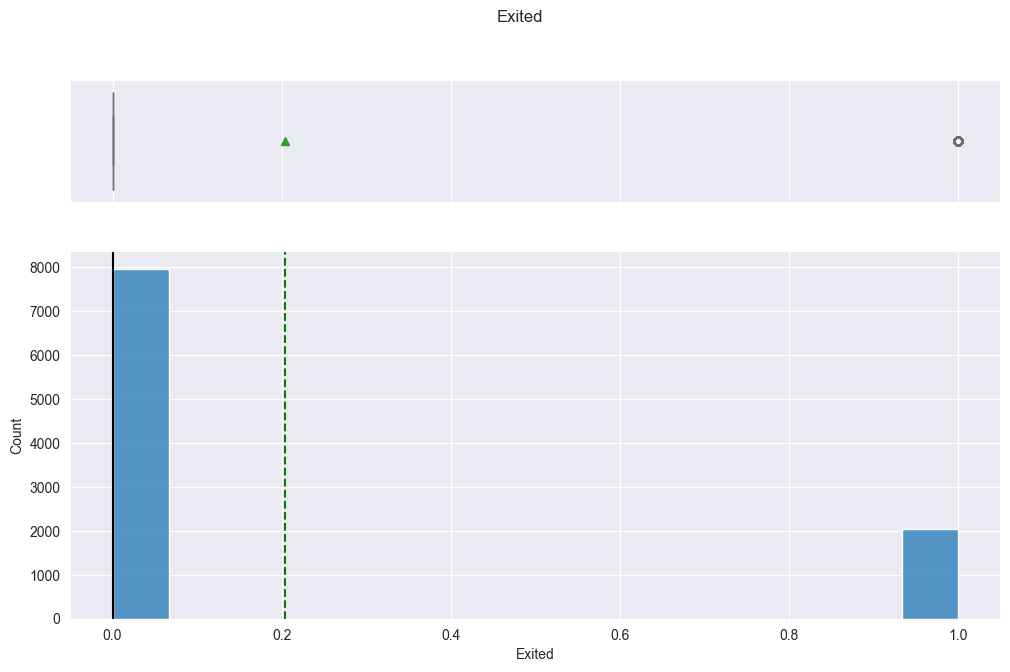

In [221]:
for i in num_columns:
    histogram_boxplot(df, i)

In [222]:
label_columns = ['Geography','Gender', 'HasCrCard', 'IsActiveMember','Exited']

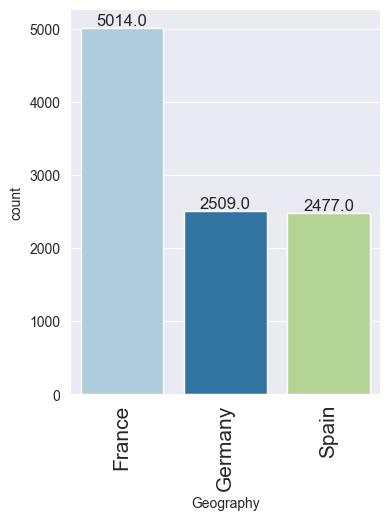

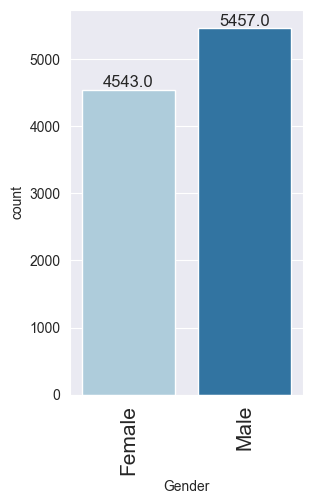

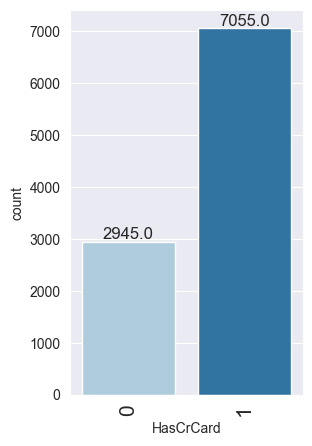

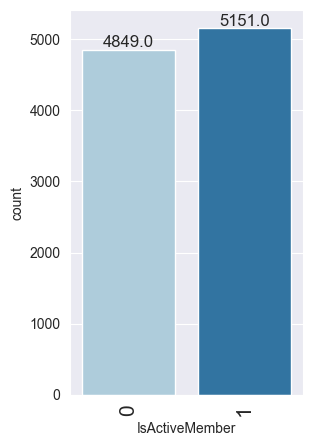

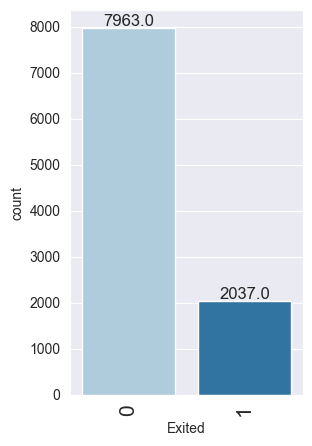

In [223]:
for i in label_columns:
    labeled_barplot(df, i)

### Bivariate Analysis

In [224]:
label_for_stacked = ['CreditScore', 'Geography','Gender','Age','Balance','IsActiveMember','HasCrCard']

Exited          0     1    All
CreditScore                   
All          7963  2037  10000
850           190    43    233
651            33    17     50
705            37    16     53
637            32    14     46
...           ...   ...    ...
810             6     0      6
442             1     0      1
488            10     0     10
814            11     0     11
472             8     0      8

[461 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


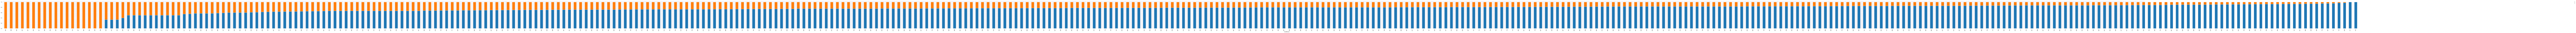

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


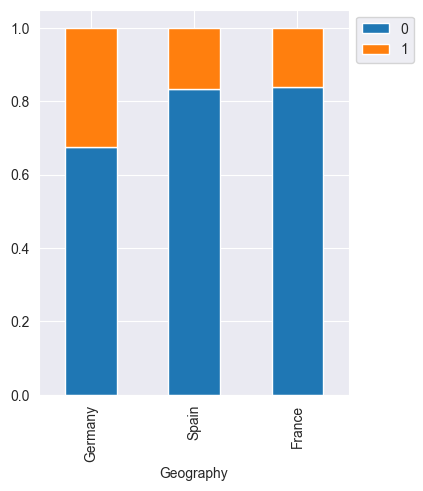

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


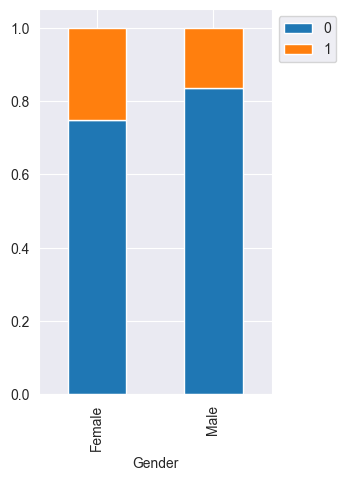

Exited     0     1    All
Age                      
All     7963  2037  10000
46       135    91    226
40       343    89    432
43       209    88    297
45       142    87    229
..       ...   ...    ...
79         4     0      4
78         5     0      5
77        10     0     10
76        11     0     11
75         9     0      9

[71 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


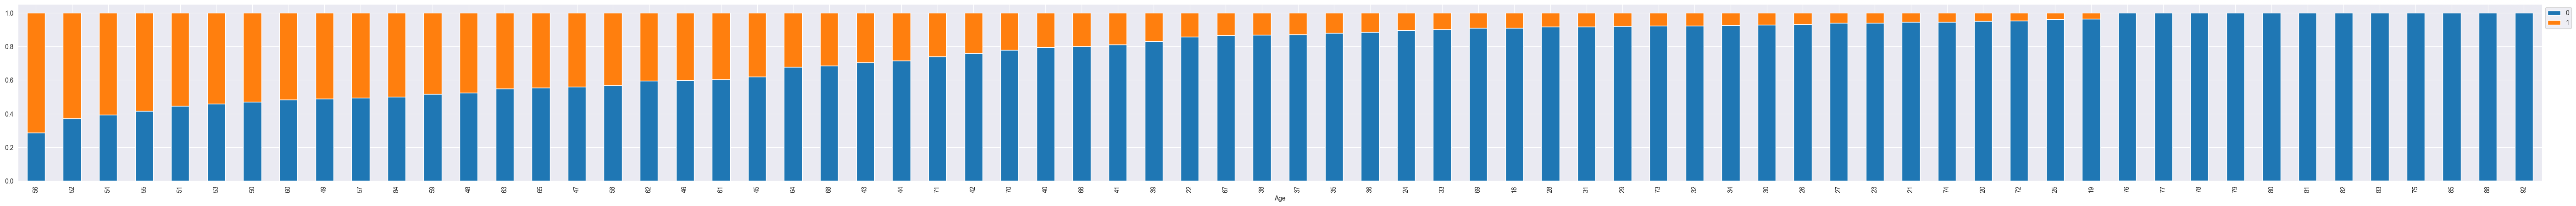

Exited        0     1    All
Balance                     
All        7963  2037  10000
0.0        3117   500   3617
12459.19      0     1      1
116973.26     0     1      1
116755.5      0     1      1
...         ...   ...    ...
117864.85     1     0      1
117852.26     1     0      1
85982.07      1     0      1
85996.19      1     0      1
127146.68     1     0      1

[6383 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


ValueError: Image size of 638300x500 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 638300x500 with 1 Axes>

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


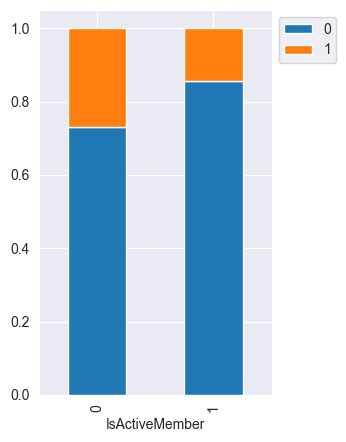

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


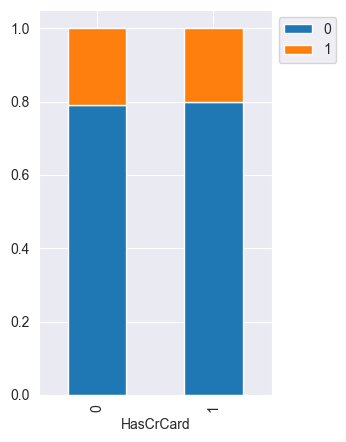

In [225]:
for i in label_for_stacked:
    stacked_barplot(df, i, 'Exited')

In [226]:
col_wrt_target = ['EstimatedSalary', 'Tenure', 'Balance']

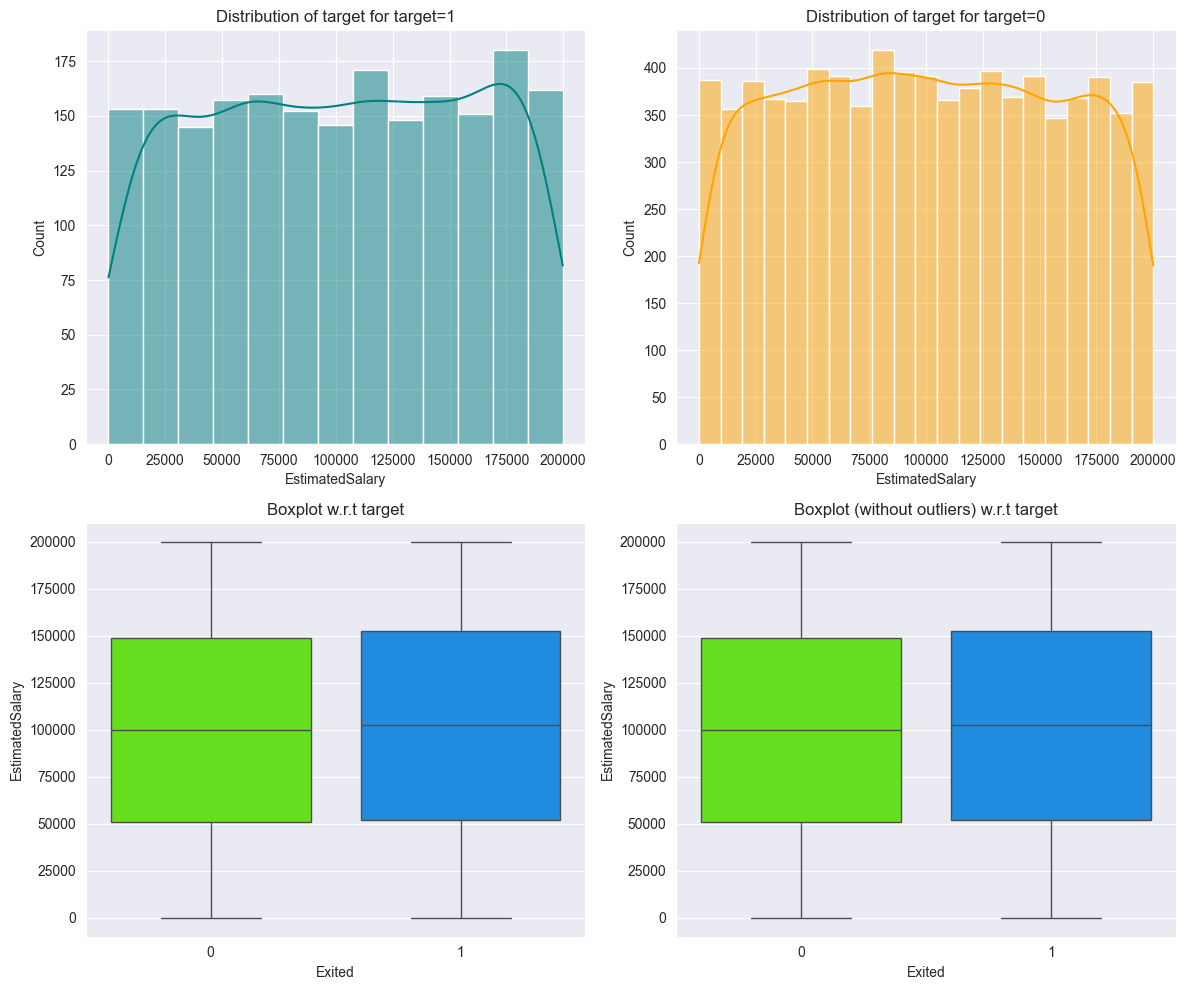

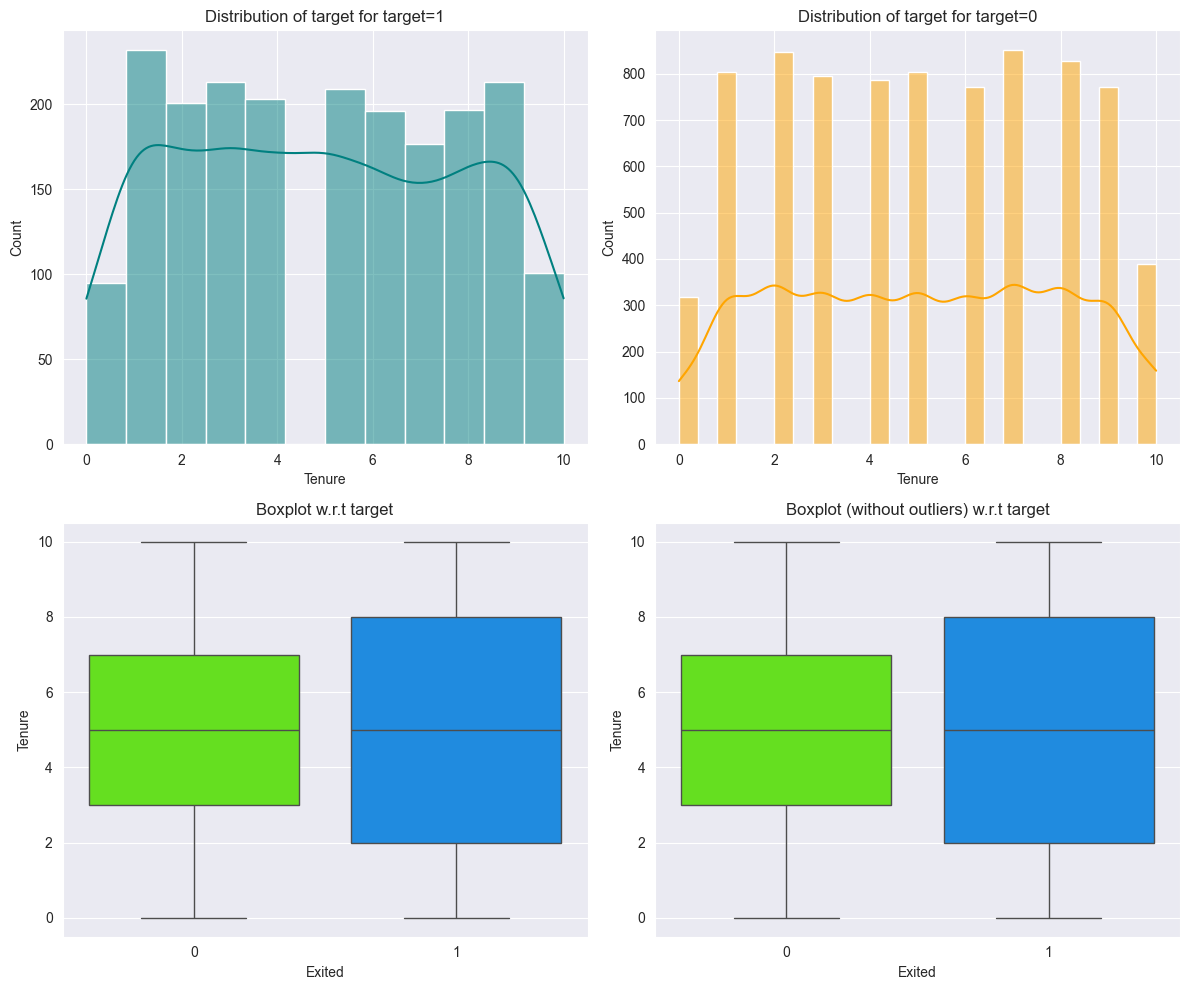

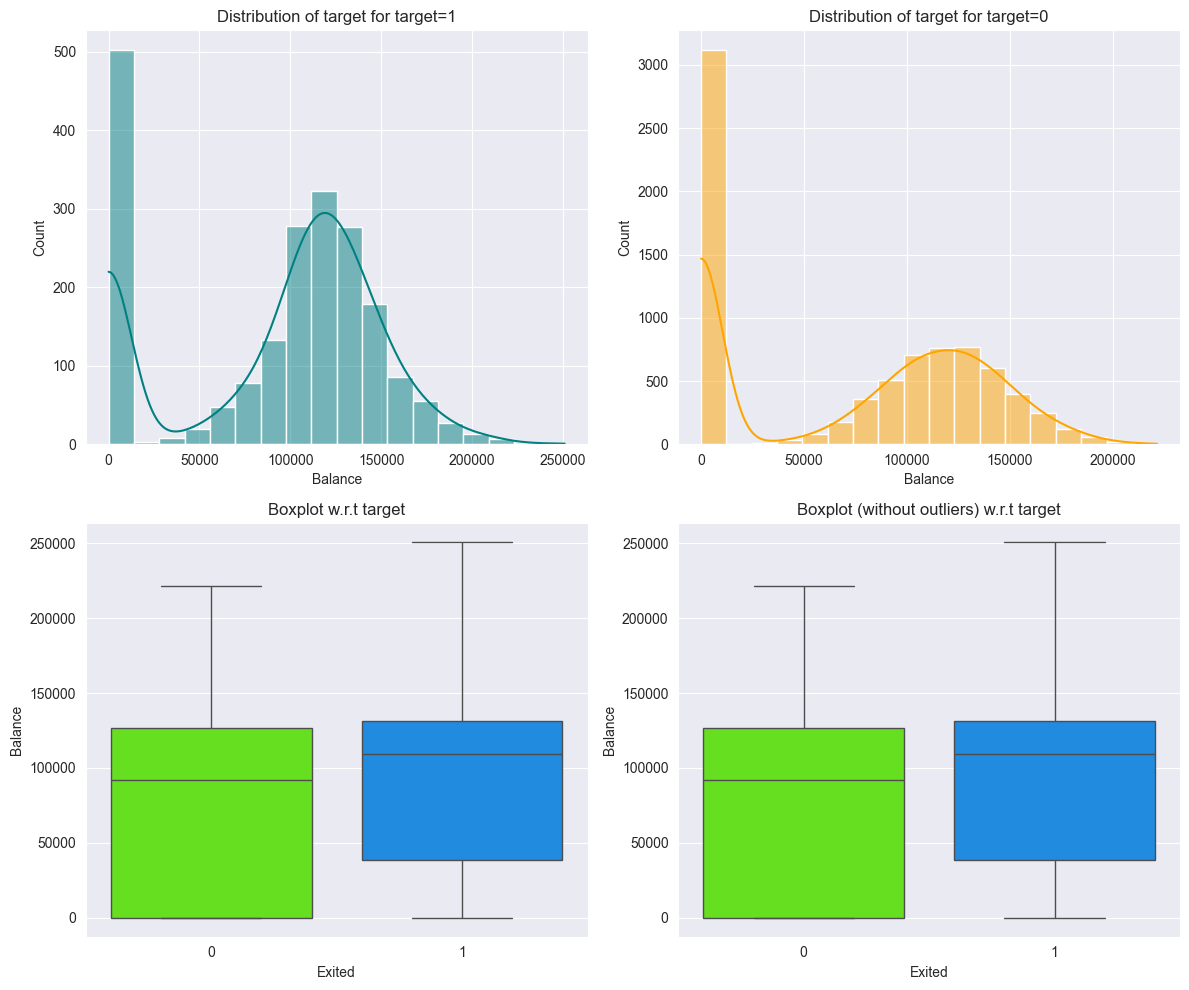

In [227]:
for i in col_wrt_target:
    distribution_plot_wrt_target(df, i, 'Exited')

### Multivar Analysis

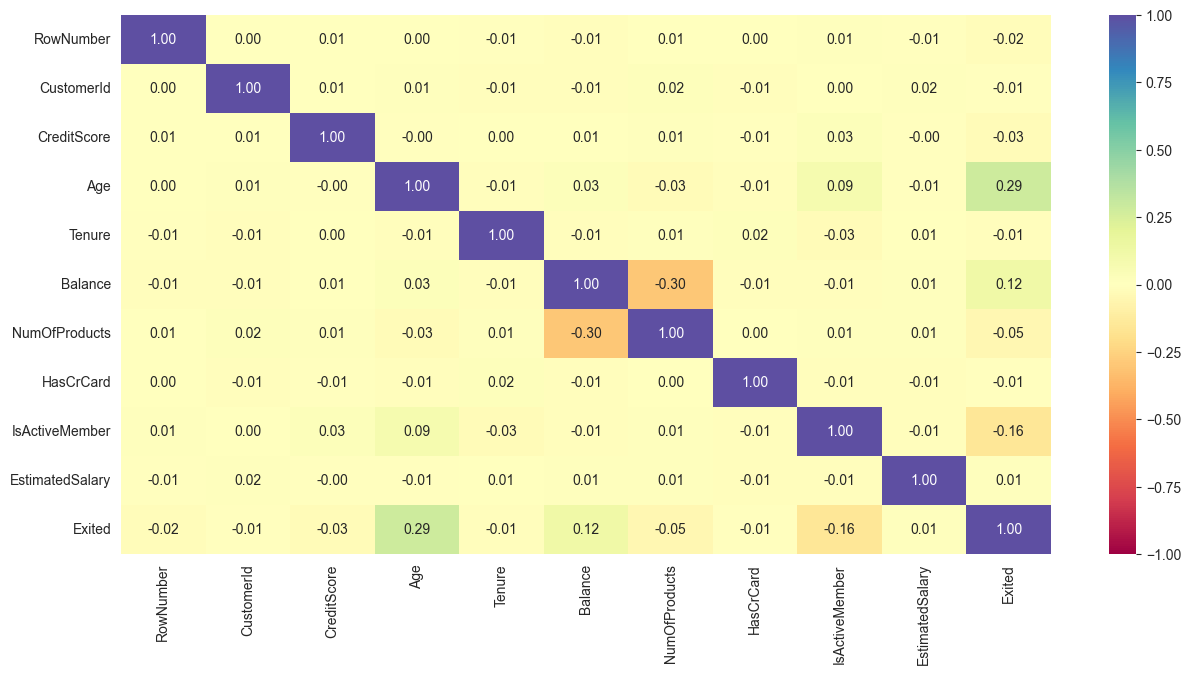

In [228]:
dataCorr = df[df.select_dtypes(include='number').columns.tolist()]
plt.figure(figsize=(15, 7))
sns.heatmap(dataCorr.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

No noticeable correlation between value numbers.

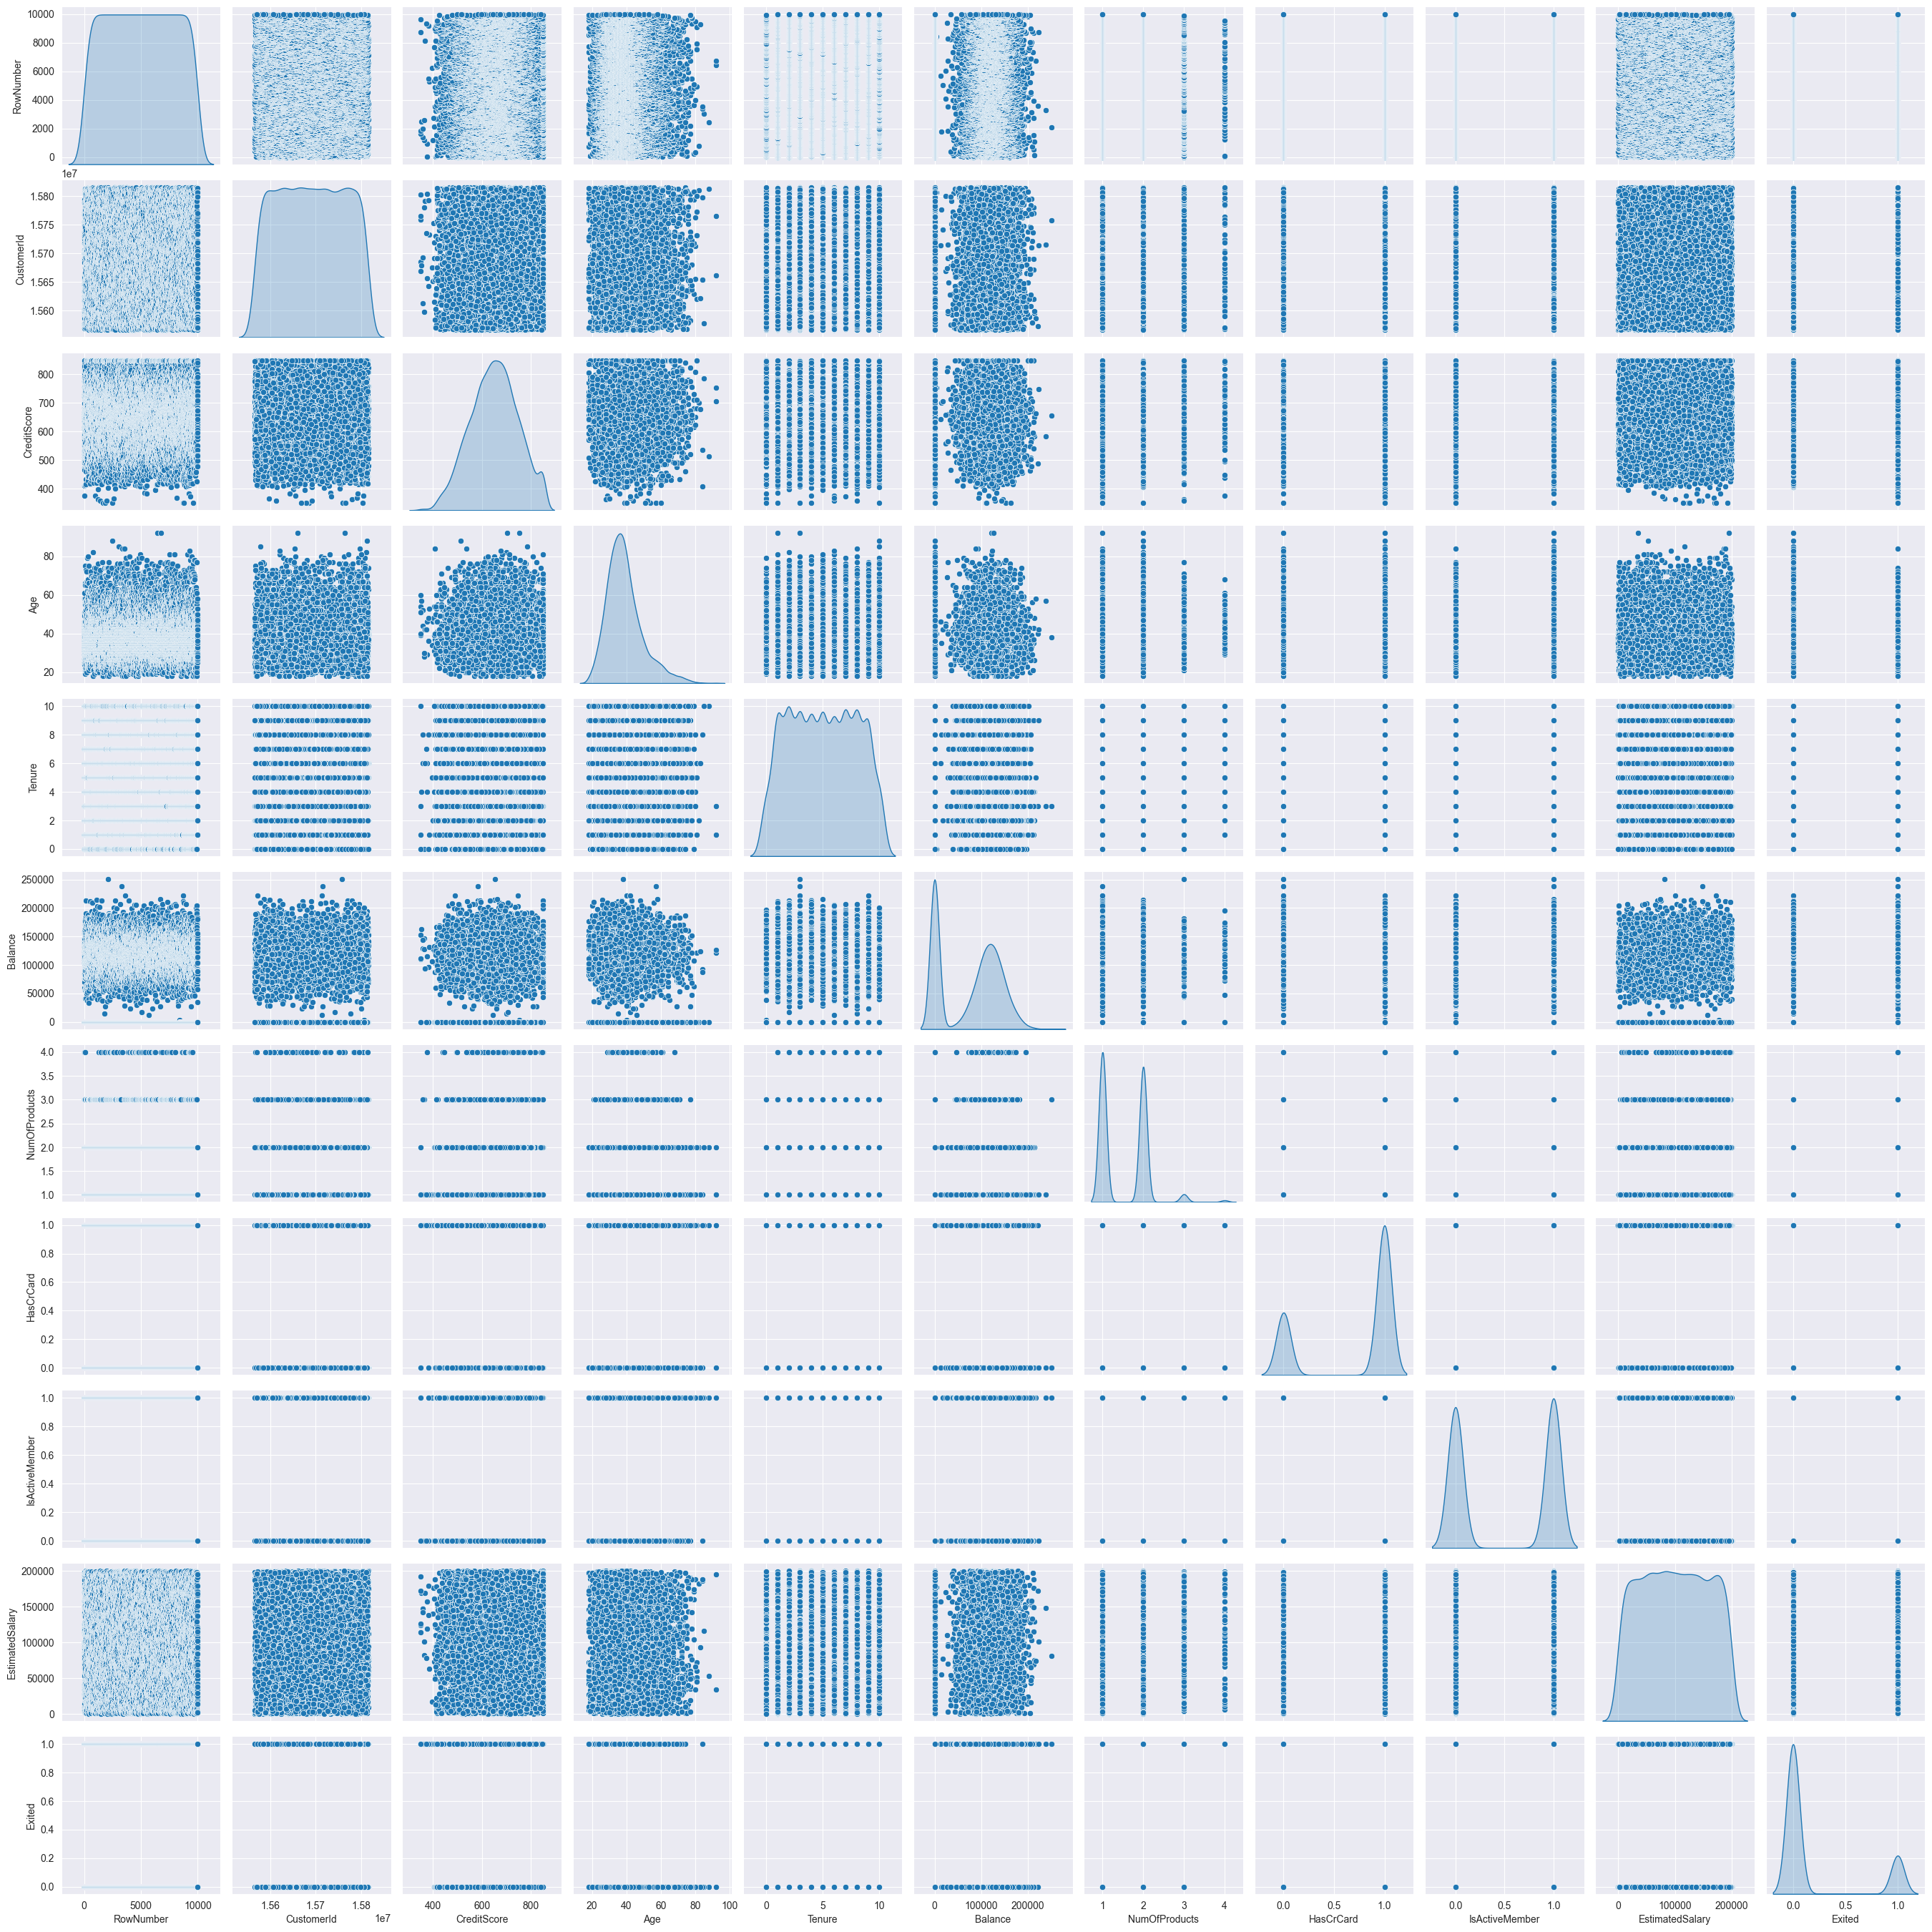

In [229]:
sns.pairplot(data=df, diag_kind="kde")
plt.show()

In [230]:
df['Balance'].sort_values(ascending=True).value_counts()

0.000         3617
130170.820       2
105473.740       2
133776.860       1
132187.730       1
              ... 
107135.040       1
107106.330       1
107104.500       1
107073.270       1
250898.090       1
Name: Balance, Length: 6382, dtype: int64

In [231]:
np.round(df['Balance'].value_counts(0)[0]/df.shape[0]*100,2)

36.17

In [232]:
print(" balance = 0 and Exited = 0: ", df[(df['Exited'] == 0)  & (df['Balance'] ==0)].value_counts().shape[0])
print(" balance = 0 and Exited = 1: ", df[(df['Exited'] == 1)  & (df['Balance'] ==0)].value_counts().shape[0])

 balance = 0 and Exited = 0:  3117
 balance = 0 and Exited = 1:  500


### Obervation
* no strong correlation between data
* ***Balance*** there is 3617 accounts which represent 36.17% of the accounts in our data sets
    * which decompose as 3117 (31.17%) of these are still active
    * 500 (5%) are closed
    *  This suggests that most 0 balance accounts are still open. It could be an indication that these accounts might not be representative of typical customer behavior, especially if they are inactive or have been recently opened without significant activity.
* ***Exited*** is imbalanced (80%/20%)
* ***CreditScore*** and ***Age*** the lower the credit score and the younger the customer seems to have a relation with closed account
* ***EstimatedSalary*** distribution seems not to represent what we could have expected, it is not a normal distribution. 
* ***Age*** there is 2 notable spikes.

### Business Context consideration
* If 0 balance accounts are a common feature of customers who don’t intend to close their accounts (e.g., they maintain the account for specific benefits despite not using it actively), removing them might bias the analysis.
* Conversely, if 0 balance accounts are mostly inactive or not contributing to the business, removing them could provide a clearer picture of churn drivers.

### Conclusion
We will try 2 model, one keeping all 0 blance accounts and a second removing 0 balance active account

## Data Preprocessing

### Feature Engineeringg

In [233]:
geography= {
    'France' : 0,
    'Germany' : 1,
    'Spain' : 2,
}
df['Geography'] = df['Geography'].map(geography)

gender = {
    'Female': 0,
    'Male': 1,
}
df['Gender'] = df['Gender'].map(gender)

### Outliers detection

In [234]:
def outlier_capping(ldf, var):
    for i in var:
        # Calculate the upper and lower limit
        Q1 = ldf[var].quantile(0.25)
        Q3 = ldf[var].quantile(0.75)

        IQR = Q3 - Q1
        lower = Q1 - 1.5*IQR
        upper = Q3 + 1.5*IQR
        ldf[var] = np.where(ldf[var] > upper, upper, np.where(ldf[var] < lower, lower, ldf[var]))

    return ldf

In [235]:
def outlier_detection_IQR(ldf, var):
    for i in var:
        # Calculate the upper and lower limit
        Q1 = ldf[var].quantile(0.25)
        Q3 = ldf[var].quantile(0.75)

        IQR = Q3 - Q1
        lower = Q1 - 1.5*IQR
        upper = Q3 + 1.5*IQR
        outliers = ldf[(ldf[var] < lower) | (ldf[var] > upper)]

    return outliers

In [236]:
def outlier_capping_zscore(ldf, var, threshold):
    for i in var:
        # Calculate the upper and lower limit
        upper = ldf[i].mean() + threshold * ldf[i].std()
        lower = ldf[i].mean() - threshold * ldf[i].std()

        ldf[var] = np.where(ldf[var] > upper, upper, np.where(ldf[var] < lower, lower, ldf[var]))

    return ldf

In [237]:
from scipy import stats
def outlier_detection_zscore(ldf, var, threshold):
    z_scores = np.abs(stats.zscore(ldf[var]))
    outliers = ldf[z_scores > threshold]
    return outliers

In [238]:
numeric_columns = df.select_dtypes("number").columns
print(numeric_columns)
for i in numeric_columns:
    outliers = outlier_detection_zscore(df, i, 3.0)
    print(f"Outliers for {i} based on Z-score method: {outliers[i].value_counts().sum()}")

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')
Outliers for RowNumber based on Z-score method: 0
Outliers for CustomerId based on Z-score method: 0
Outliers for CreditScore based on Z-score method: 8
Outliers for Geography based on Z-score method: 0
Outliers for Gender based on Z-score method: 0
Outliers for Age based on Z-score method: 133
Outliers for Tenure based on Z-score method: 0
Outliers for Balance based on Z-score method: 0
Outliers for NumOfProducts based on Z-score method: 60
Outliers for HasCrCard based on Z-score method: 0
Outliers for IsActiveMember based on Z-score method: 0
Outliers for EstimatedSalary based on Z-score method: 0
Outliers for Exited based on Z-score method: 0


In [239]:
print(numeric_columns)
for i in numeric_columns:
    outliers = outlier_detection_IQR(df, i)
    print(f"Outliers for {i} based on IQR method: {outliers[i].value_counts().sum()}")

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')
Outliers for RowNumber based on IQR method: 0
Outliers for CustomerId based on IQR method: 0
Outliers for CreditScore based on IQR method: 15
Outliers for Geography based on IQR method: 0
Outliers for Gender based on IQR method: 0
Outliers for Age based on IQR method: 359
Outliers for Tenure based on IQR method: 0
Outliers for Balance based on IQR method: 0
Outliers for NumOfProducts based on IQR method: 60
Outliers for HasCrCard based on IQR method: 0
Outliers for IsActiveMember based on IQR method: 0
Outliers for EstimatedSalary based on IQR method: 0
Outliers for Exited based on IQR method: 2037


#### Outlier detection conclusion
* ***Age*** will not be processed as an outlier
* ***CreditScore*** the higher credit score bin is more represeted, but it is expected as no client can have a higher score
* ***NumOfProducts*** again this a consequence of the business

### Data preparation Modeling
As explained in the EDA with drop irrelevant columns for our models.

In [355]:
X = df.drop(["RowNumber", "CustomerId", 'Surname', 'Exited'], axis=1, inplace=False)
y = df["Exited"]

In [356]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6000, 10) (2000, 10) (2000, 10)


In [357]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 6000
Number of rows in validation data = 2000
Number of rows in test data = 2000


### Reverse Mapping for Encoded Variables

In [358]:
## Function to inverse the encoding
def inverse_mapping_cat(x, y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype("category")
    X_val[y] = np.round(X_val[y]).map(inv_dict).astype("category")
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype("category")

In [359]:
inverse_mapping_cat(gender, 'Gender') 
inverse_mapping_cat(geography, 'Geography')

In [360]:
X_train.info()
X_val.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 4472 to 29
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      6000 non-null   int64   
 1   Geography        6000 non-null   category
 2   Gender           6000 non-null   category
 3   Age              6000 non-null   int64   
 4   Tenure           6000 non-null   int64   
 5   Balance          6000 non-null   float64 
 6   NumOfProducts    6000 non-null   int64   
 7   HasCrCard        6000 non-null   int64   
 8   IsActiveMember   6000 non-null   int64   
 9   EstimatedSalary  6000 non-null   float64 
dtypes: category(2), float64(2), int64(6)
memory usage: 433.8 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 4693 to 627
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      2000 non-null   int64   
 1   Geograph

In [361]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

France     2999
Spain      1510
Germany    1491
Name: Geography, dtype: int64
******************************
Male      3260
Female    2740
Name: Gender, dtype: int64
******************************


In [362]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

France     1007
Germany     513
Spain       480
Name: Geography, dtype: int64
******************************
Male      1103
Female     897
Name: Gender, dtype: int64
******************************


In [363]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_test[i].value_counts())
    print("*" * 30)

France     1008
Germany     505
Spain       487
Name: Geography, dtype: int64
******************************
Male      1094
Female     906
Name: Gender, dtype: int64
******************************


In [364]:
# importing SMOTE
from imblearn.over_sampling import SMOTE

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score

import random

In [365]:
# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout

### Dummy Variable Creation

In [366]:
X_train = pd.get_dummies(X_train, drop_first=False)
X_val = pd.get_dummies(X_val, drop_first=False)
X_test = pd.get_dummies(X_test, drop_first=False)
print(X_train.shape, X_val.shape, X_test.shape)

(6000, 13) (2000, 13) (2000, 13)


### Train-validation-test Split

This step has been done above as well as processing outlier and imputation to prevent data leakage between the training, validation, and testing set

In [367]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 4693 to 627
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        2000 non-null   int64  
 1   Age                2000 non-null   int64  
 2   Tenure             2000 non-null   int64  
 3   Balance            2000 non-null   float64
 4   NumOfProducts      2000 non-null   int64  
 5   HasCrCard          2000 non-null   int64  
 6   IsActiveMember     2000 non-null   int64  
 7   EstimatedSalary    2000 non-null   float64
 8   Geography_France   2000 non-null   uint8  
 9   Geography_Germany  2000 non-null   uint8  
 10  Geography_Spain    2000 non-null   uint8  
 11  Gender_Female      2000 non-null   uint8  
 12  Gender_Male        2000 non-null   uint8  
dtypes: float64(2), int64(6), uint8(5)
memory usage: 150.4 KB


### Data Normalization

In [368]:
from sklearn.compose import ColumnTransformer
# Define the columns order
colomn_order = X_train.columns
numeric_columns_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts','EstimatedSalary']
# Transform the training, validation, and testing data on the scaler fit on my training data to prevent leakage
# Define the ColumnTransformer: apply StandardScaler to numeric columns only
column_transformer = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), numeric_columns_to_scale)
    ],
    remainder='passthrough'  # Keep the other columns (dummy variables) unchanged
)


X_train_scaled = column_transformer.fit_transform(X_train)
# convert the result back to a dataframe
X_train_scaled = pd.DataFrame(X_train_scaled,columns=colomn_order)

# scale validation data with the training set parameter for data leakage
X_val_scaled = column_transformer.transform(X_val)
# convert the result back to a dataframe
X_val_scaled = pd.DataFrame(X_val_scaled,columns=colomn_order)

# scale validation data with the training set parameter for data leakage
X_test_scaled = column_transformer.transform(X_test)
# convert the result back to a dataframe
X_test_scaled = pd.DataFrame(X_test_scaled,columns=colomn_order)

print(X_train_scaled.shape, X_val_scaled.shape, X_test_scaled.shape)


(6000, 13) (2000, 13) (2000, 13)


## Model Building

### Model Evaluation Criterion

Write down the logic for choosing the metric that would be the best metric for this business scenario.
* For churn prediction, the most relevant metrics usually include Recall (to minimize the number of actual churners incorrectly classified as non-churners).
* AUC-ROC a good metric for evaluating models in imbalanced datasets as it considers both sensitivity and specificity.


In [369]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred = model.predict(predictors)  > threshold

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score
    auc = roc_auc_score(target, pred)

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
            "AUC-ROC": auc,

        },
        index=[0],
    )

    return df_perf

In [370]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

### Neural Network with SGD Optimizer

In [415]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [416]:
from keras.initializers import HeNormal
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1], kernel_initializer=HeNormal()))
model.add(Dense(7,activation="relu", kernel_initializer=HeNormal()))
model.add(Dense(1,activation="sigmoid"))

In [417]:
from keras.optimizers import SGD
# Compile the model with SGD optimizer
model.compile(optimizer=SGD(), loss='binary_crossentropy', metrics=['Recall'])

# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                196       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 309 (1.21 KB)
Trainable params: 309 (1.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [418]:
batch_size = 32
epochs = 100

In [419]:
# Calculate the class weights for an imbalanced dataset
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(y_train),
                                     y=y_train
                                  )
cw_dict = {}
for i in range(class_weights.shape[0]):
    cw_dict[i] = class_weights[i]
    
cw_dict

{0: 0.6278777731268314, 1: 2.454991816693944}

In [420]:
from tensorflow.keras.callbacks import EarlyStopping
es_cb = EarlyStopping(
    monitor="recall",
    patience=10,
    restore_best_weights=True,
    verbose=1,
    start_from_epoch=5,
    mode='max',
)

In [421]:
import time
start = time.time()
history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict, callbacks=[es_cb])
end=time.time()

Epoch 1/100
188/188 [==============================] - 0s 826us/step - loss: 0.6891 - recall: 0.2881 - val_loss: 0.6255 - val_recall: 0.4044
Epoch 2/100
188/188 [==============================] - 0s 467us/step - loss: 0.6584 - recall: 0.5106 - val_loss: 0.6227 - val_recall: 0.5956
Epoch 3/100
188/188 [==============================] - 0s 435us/step - loss: 0.6400 - recall: 0.6735 - val_loss: 0.6055 - val_recall: 0.6863
Epoch 4/100
188/188 [==============================] - 0s 430us/step - loss: 0.6257 - recall: 0.7079 - val_loss: 0.6050 - val_recall: 0.7353
Epoch 5/100
188/188 [==============================] - 0s 465us/step - loss: 0.6127 - recall: 0.7316 - val_loss: 0.6049 - val_recall: 0.7672
Epoch 6/100
188/188 [==============================] - 0s 446us/step - loss: 0.6016 - recall: 0.7643 - val_loss: 0.5871 - val_recall: 0.7623
Epoch 7/100
188/188 [==============================] - 0s 463us/step - loss: 0.5914 - recall: 0.7578 - val_loss: 0.5907 - val_recall: 0.7892
Epoch 8/100
1

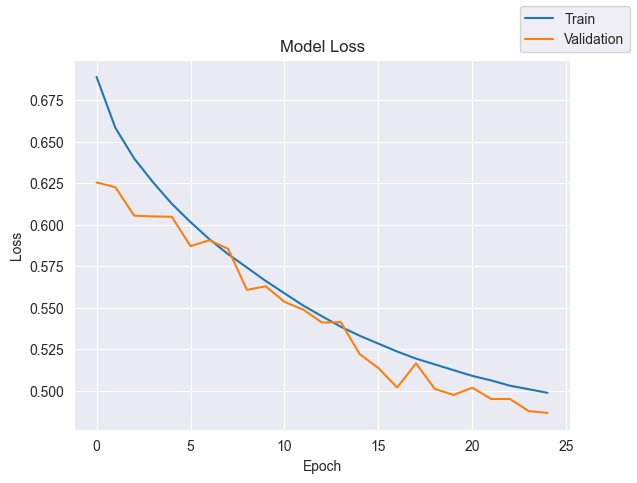

In [422]:
plot(history,'loss')

In [425]:
model_1_train_perf = model_performance_classification(model, X_train_scaled, y_train)
model_1_train_perf

188/188 [==============================] - 0s 249us/step


Accuracy  Recall  Precision    F1  AUC-ROC
0     0.700   0.774      0.383 0.512    0.727

In [426]:
model_1_val_perf = model_performance_classification(model, X_val_scaled, y_val)
model_1_val_perf

63/63 [==============================] - 0s 279us/step


Accuracy  Recall  Precision    F1  AUC-ROC
0     0.698   0.762      0.380 0.507    0.722

## Model Performance Improvement

### Neural Network with Adam Optimizer

### Neural Network with Adam Optimizer and Dropout

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [ ]:
# Fit SMOTE on train data(Synthetic Minority Oversampling Technique)
sm = SMOTE(sampling_strategy=0.4, k_neighbors=5, random_state=1)
X_train_scaled_over, y_train_over = sm.fit_resample(X_train_scaled, y_train)

In [ ]:
print("Before OverSampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After OverSampling, count of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, count of label '0': {} \n".format(sum(y_train_over == 0)))

print("After OverSampling, the shape of train_X: {}".format(X_train_scaled_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

## Model Performance Comparison and Final Model Selection# training performance comparison

In [ ]:
models_train_comp_df = pd.concat(
    [
        model_0_train_perf.T,
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
        model_4_train_perf.T,
        model_5_train_perf.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Neural Network (SGD, No Regularization)",
    "Neural Network (Adam , No Regularization)",
    "Neural Network (Adam , dropout [0.4,0.2])",
    "Neural Network (SGD ,SMOTE)",
    "Neural Network (Adam, SMOTE)",
    "Neural Network (Adam , dropout [0.4,0.2], SMOTE)"
]

In [ ]:
#Validation performance comparison

models_valid_comp_df = pd.concat(
    [
        model_0_valid_perf.T,
        model_1_valid_perf.T,
        model_2_valid_perf.T,
        model_3_valid_perf.T,
        model_4_valid_perf.T,
        model_5_valid_perf.T
    ],
    axis=1,
)
models_valid_comp_df.columns = [
    "Neural Network (SGD, No Regularization)",
    "Neural Network (Adam , No Regularization)",
    "Neural Network (Adam , dropout [0.4,0.2])",
    "Neural Network (SGD ,SMOTE)",
    "Neural Network (Adam, SMOTE)",
    "Neural Network (Adam , dropout [0.4,0.2], SMOTE)"
]

In [ ]:
models_train_comp_df.highlight_max(color = 'darkgreen', axis = 1)

In [ ]:
models_train_comp_df.highlight_max(color = 'darkgreen', axis = 1)

## Actionable Insights and Business Recommendations

*



<font size=6 color='blue'>Power Ahead</font>
___